In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir =r'C:\Users\ANKUSH\Downloads\Final_Assignment_Face Mask Dataset\Train'
validation_dir =r'C:\Users\ANKUSH\Downloads\Final_Assignment_Face Mask Dataset\Validation'
test_dir =r'C:\Users\ANKUSH\Downloads\Final_Assignment_Face Mask Dataset\Test'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [5]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=313,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25,
      callbacks=[checkpoint_cb])

Epoch 1/10
313/313 [==============================] - 61s 173ms/step - loss: 0.0880 - acc: 0.9659 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 2/10
313/313 [==============================] - 52s 165ms/step - loss: 0.0291 - acc: 0.9904 - val_loss: 0.0028 - val_acc: 0.9987
Epoch 3/10
313/313 [==============================] - 52s 164ms/step - loss: 0.0199 - acc: 0.9939 - val_loss: 0.0020 - val_acc: 0.9987
Epoch 4/10
313/313 [==============================] - 52s 165ms/step - loss: 0.0166 - acc: 0.9944 - val_loss: 0.0047 - val_acc: 0.9987
Epoch 5/10
313/313 [==============================] - 52s 165ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 2.1144e-04 - val_acc: 1.0000
Epoch 6/10
313/313 [==============================] - 52s 164ms/step - loss: 0.0119 - acc: 0.9959 - val_loss: 3.2606e-06 - val_acc: 1.0000
Epoch 7/10
313/313 [==============================] - 52s 164ms/step - loss: 0.0135 - acc: 0.9961 - val_loss: 7.9454e-04 - val_acc: 1.0000
Epoch 8/10
313/313 [=======================

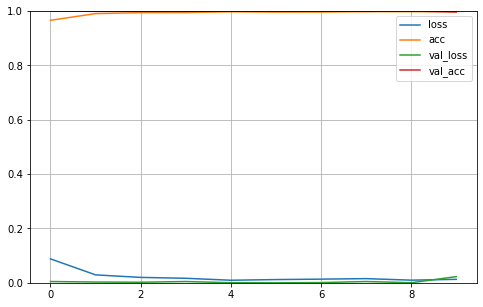

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
hist_df = pd.DataFrame(history.history) 

In [13]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [14]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 992 images belonging to 2 classes.


In [17]:
model.evaluate(test_generator, steps=31)

31/31 [==============================] - 2s 54ms/step - loss: 0.0387 - acc: 0.9970


[0.03865635395050049, 0.9969757795333862]